In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load('de_core_news_sm')

parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu_csu',
    'afd',
]

media = [
    'junge Welt',
    "NachDenkSeiten",
    'taz',
    'Süddeutsche Zeitung',
    'stern TV',
    "DER SPIEGEL",
    'Der Tagesspiegel',
    'ARD',
    #'Tagesschau',
    'ZDF',
    "ZDFheute Nachrichten",
    'Bayerischer Rundfunk',
    'ntv Nachrichten',
    'RTL',
    'FOCUS Online',
    'ZEIT ONLINE',
    'faz',
    'WELT',
    "BILD",
    'NZZ Neue Zürcher Zeitung',
    "Junge Freiheit",
    'COMPACTTV'
]

df = pd.read_pickle('../data/topic.pkl')
df['contains_cdu'] = df['preprocessed'].str.contains('cdu')
df['contains_csu'] = df['preprocessed'].str.contains('csu')
df['contains_fdp'] = df['preprocessed'].str.contains('fdp')
df['contains_grüne'] = df['preprocessed'].str.contains('grüne') 
df['contains_linke'] = df['preprocessed'].str.contains('linke')
df['contains_afd'] = df['preprocessed'].str.contains('afd') | df['preprocessed'].str.contains('afg')
df['contains_spd'] = df['preprocessed'].str.contains('spd')
df['contains_party'] = df['contains_cdu'] | df['contains_csu'] | df['contains_fdp'] | df['contains_grüne'] | df['contains_linke'] | df['contains_afd'] | df['contains_spd'] 

bt = pd.read_pickle('../assets/bundestag.pkl')
bt.drop(columns=['Geburts-jahr', 'Land', 'Listen-platz', 'Erst-stimmen-anteil', 'Listen-platz', 'Wahlkreis', 'BeruflicherHintergrund', 'MdBseit', 'Bemerkungen'], inplace=True)
party_blacklist = [
    'fraktionslos(SSW)',
    'fraktionslos (Zentrum)',
    'fraktionslos (AfD)',
    'fraktionslos (ehemals AfD)',
]
bt = bt[bt['Fraktion(Partei)'].isin(party_blacklist) == False]
bt.loc[bt['Fraktion(Partei)'] == 'CDU/CSU (CDU)', 'Fraktion(Partei)'] = 'cdu_csu'
bt.loc[bt['Fraktion(Partei)'] == 'CDU/CSU (CSU)', 'Fraktion(Partei)'] = 'cdu_csu'
politician_dict = bt.set_index('Name').to_dict()['Fraktion(Partei)']
politicians = {
    politician.lower():politician_dict[politician].lower() for politician in list(politician_dict.keys())
}

In [42]:
mentions_by_media = df.groupby(['medium'])[['contains_afd', 'contains_cdu', 'contains_csu', 'contains_fdp', 'contains_spd', 'contains_grüne', 'contains_linke']].sum()
mentions_by_media = mentions_by_media.loc[media].transpose()

[Text(0.5, 50.09375, 'party'),
 Text(59.99999999999999, 0.5, 'medium'),
 Text(0.5, 1.0, 'party mentions by media source, standard scaling')]

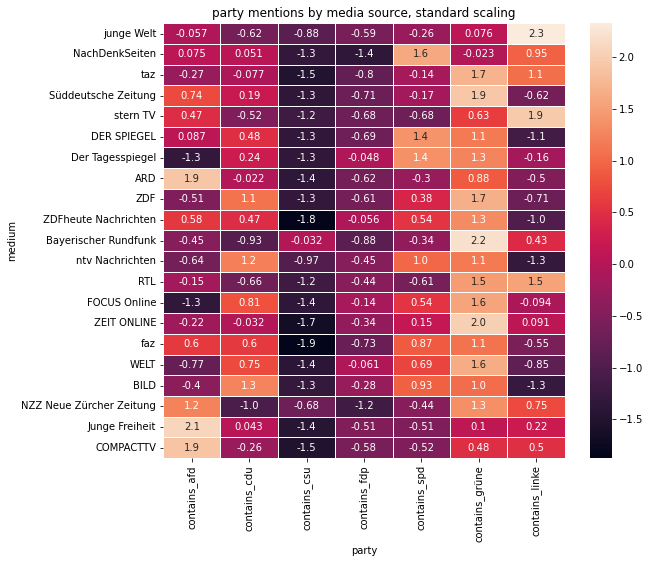

In [43]:
scaler = StandardScaler()
mentions_by_media_scaled = mentions_by_media.copy(deep=True)
mentions_by_media_scaled = pd.DataFrame(scaler.fit_transform(mentions_by_media_scaled), columns=mentions_by_media_scaled.columns, index=mentions_by_media_scaled.index).transpose()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(mentions_by_media_scaled, annot=True, fmt=".2", linewidths=.5, ax=ax)
ax.set(xlabel='party', ylabel='medium', title='party mentions by media source, standard scaling')

In [44]:
for party in list(set(politicians.values())):
    df['politician_count_'+party] = [0 for _ in range(df.shape[0])]

for politician in tqdm(politicians.keys()):
    df['politician_count_'+politicians[politician]] += df['preprocessed'].str.contains(politician)

politician_mentions_by_media = df.groupby(['medium'])[['politician_count_afd', 'politician_count_cdu_csu', 'politician_count_fdp', 'politician_count_spd', 'politician_count_grüne', 'politician_count_linke']].sum()
politician_mentions_by_media = politician_mentions_by_media.loc[media].transpose()

100%|██████████| 731/731 [06:03<00:00,  2.01it/s]


[Text(0.5, 50.09375, 'party'),
 Text(59.99999999999999, 0.5, 'medium'),
 Text(0.5, 1.0, 'politician mentions by media source, standard scaling')]

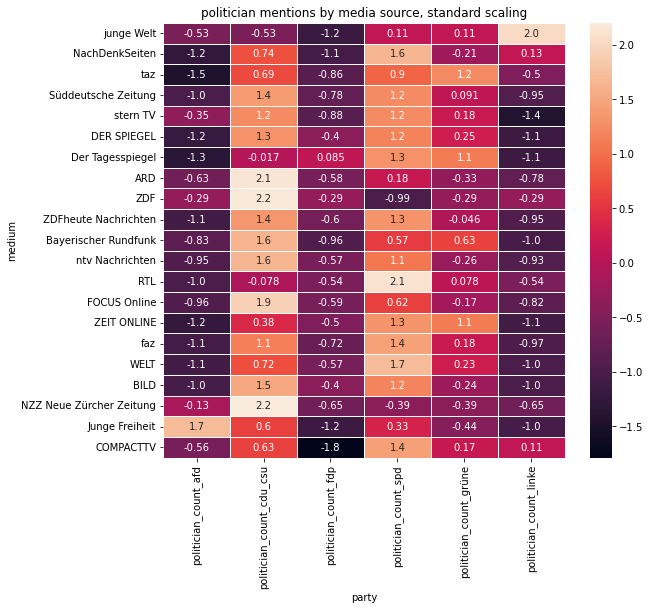

In [45]:
scaler = StandardScaler()
politician_mentions_by_media_scaled = politician_mentions_by_media.copy(deep=True)
politician_mentions_by_media_scaled = pd.DataFrame(scaler.fit_transform(politician_mentions_by_media_scaled), columns=politician_mentions_by_media_scaled.columns, index=politician_mentions_by_media_scaled.index).transpose()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(politician_mentions_by_media_scaled, annot=True, fmt=".2", linewidths=.5, ax=ax)
ax.set(xlabel='party', ylabel='medium', title='politician mentions by media source, standard scaling')